In [0]:
from torchvision import datasets,transforms

In [0]:
transform=transforms.Compose([
                              transforms.RandomHorizontalFlip(),
                              transforms.RandomVerticalFlip(),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [4]:
training_data=datasets.CIFAR10('training_data/',download=True,train=True,transform=transform)
testing_data=datasets.CIFAR10('testing_data/',download=True,train=False,transform=transform)


Extracting training_data/cifar-10-python.tar.gz to training_data/



Extracting testing_data/cifar-10-python.tar.gz to testing_data/


In [0]:
import numpy as np
num_workers=20
batch_size=20
valid_size=0.2

num_train=len(training_data)
indices=list(range(num_train))
np.random.shuffle(indices)

In [0]:
split=int(np.floor(valid_size*num_train))

In [0]:
valid_idx,train_idx=indices[:split],indices[split:]

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

In [0]:
train_sampler=SubsetRandomSampler(train_idx)#randomly sample indices from a list of indices
valid_sample=SubsetRandomSampler(valid_idx)

In [0]:
from torch.utils.data import DataLoader

In [0]:
train_loader=DataLoader(training_data,batch_size=batch_size,sampler=train_sampler,num_workers=num_workers)

In [0]:
valid_loader=DataLoader(training_data,sampler=valid_sample,batch_size=batch_size,num_workers=num_workers)

In [13]:
len(train_loader)

2000

In [14]:
len(valid_loader)

500

In [0]:
import torch.nn as nn

In [37]:
from torch.optim import SGD
import torch
model=nn.Sequential(
    nn.Conv2d(3,16,3,padding=1,stride=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Dropout(p=0.2),
    nn.Conv2d(16,32,3,padding=1,stride=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Dropout(p=0.2),
    nn.Conv2d(32,64,3,padding=1,stride=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(),
    nn.Linear(64*4*4,500),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(500,10),
    nn.LogSoftmax(dim=1)
)
criterion=nn.NLLLoss()
optimizer=SGD(model.parameters(),lr=0.01)

epochs=35
model.cuda()
training_loss=[]
validation_loss=[]
for epoch in range(epochs):
  print('*'*10)
  model.train()
  print('TRAINING...')
  epoch_training_loss=0
  epoch_validation_loss=0
  for images,labels in train_loader:
    optimizer.zero_grad()
    images,labels=images.cuda(),labels.cuda()
    output=model.forward(images)
    loss=criterion(output,labels)
    epoch_training_loss+=loss.item()
    loss.backward()
    optimizer.step()
  else:
    train_loss=epoch_training_loss/len(train_loader)
    training_loss.append(train_loss)
    print(f'Epoch : {epoch}')
    print(f'Training Loss : {train_loss}')
  model.eval()
  print('VALIDATING...')
  for images,labels in valid_loader:
    images,labels=images.cuda(),labels.cuda()
    with torch.no_grad():
      output=model.forward(images)
      loss=criterion(output,labels)
      epoch_validation_loss+=loss.item()
  else:
    val_loss=epoch_validation_loss/len(valid_loader)
    validation_loss.append(val_loss)
    print(f'Validation Loss : {val_loss}')

**********
TRAINING...
Epoch : 0
Training Loss : 2.1268356358408926
VALIDATING...
Validation Loss : 1.86653901553154
**********
TRAINING...
Epoch : 1
Training Loss : 1.7588067920207977
VALIDATING...
Validation Loss : 1.6259063124656676
**********
TRAINING...
Epoch : 2
Training Loss : 1.5980817859768868
VALIDATING...
Validation Loss : 1.5167128695249557
**********
TRAINING...
Epoch : 3
Training Loss : 1.5047113194167614
VALIDATING...
Validation Loss : 1.4558767039775848
**********
TRAINING...
Epoch : 4
Training Loss : 1.4327619913816452
VALIDATING...
Validation Loss : 1.3881864495277405
**********
TRAINING...
Epoch : 5
Training Loss : 1.376037940353155
VALIDATING...
Validation Loss : 1.3165311549901961
**********
TRAINING...
Epoch : 6
Training Loss : 1.3295367542505265
VALIDATING...
Validation Loss : 1.2744453101158142
**********
TRAINING...
Epoch : 7
Training Loss : 1.283560849428177
VALIDATING...
Validation Loss : 1.2629843828678131
**********
TRAINING...
Epoch : 8
Training Loss : 1.2

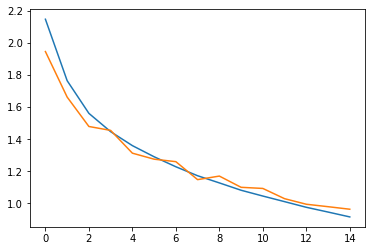

In [25]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)

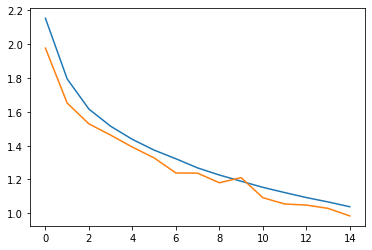

In [27]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)

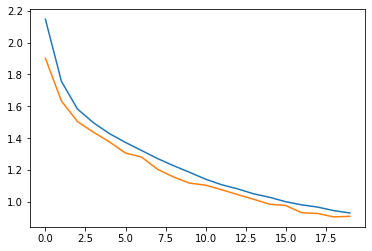

In [29]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)

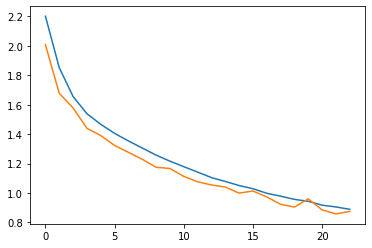

In [31]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)

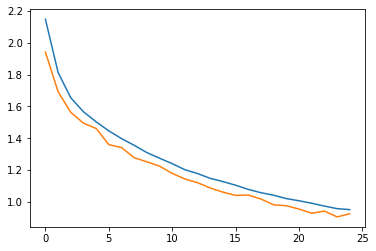

In [34]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)

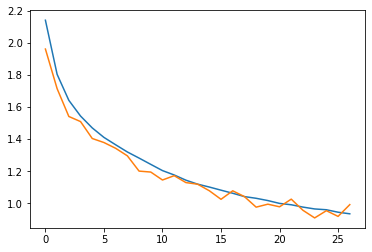

In [36]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)

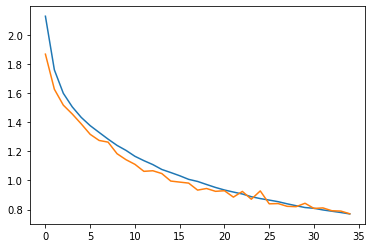

In [38]:
import matplotlib.pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)

In [0]:
images,labels =next(iter(train_loader))

In [0]:
output=model.forward(images)

In [34]:
output.shape

torch.Size([20, 10])

In [35]:
labels.shape

torch.Size([20])

In [52]:
import torch
import numpy as np
with torch.no_grad():
  output=model.forward(images)
  print(np.argmax(output[1]).item())
  print(labels[1].item())

8
0
